In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [136]:
data = 'Data/insurance - insurance.csv'

In [137]:
df = pd.read_csv(data)

In [138]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Q1. Do smokers have higher insurance charges than non-smokers?




Hypothesis testing state the Hypothesis and null hypothesis Null Hypothesis: the amount is the same for charges between smokers and non-smokers.

Alternative Hypothesis: smokers' charges is in higher difference than non-smokers'

In [140]:
df_s = df[['smoker','charges']]
df_s.head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [141]:
s_df = df_s.loc[df_s['smoker']=='yes',['smoker','charges']]
non_s_df = df_s.loc[df_s['smoker']=='no',['smoker','charges']]
print(f"There are {len(s_df)} smokers")
print(f"There are {len(non_s_df)} non-smokers")

There are 274 smokers
There are 1064 non-smokers


In [142]:
s_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [143]:
non_s_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [144]:
## concatenate the two dataframes for visulziation.
plot_df = pd.concat([s_df,non_s_df],axis=0)
plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


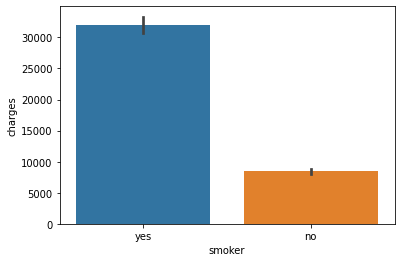

In [145]:
## viusalizing means 
ax = sns.barplot(data=plot_df,x='smoker',y='charges',ci=95)

In [146]:
s_group = s_df['charges']
non_s_group = non_s_df['charges']
display(s_group.head(),non_s_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

checking assumptions of 2-sample test according the work flow, the 2-sample t-test has the following assumptions No significant outliers Normality Equal Variance


In [147]:
# checking assumptions of 2-sample t-test
## checking each group seperately
## checking for abs value of z-scores that are > 3
is_outlier_smokers = np.abs(stats.zscore(s_group)) > 3
print(f"There are {is_outlier_smokers.sum()} outliers in the female group out of {len(s_group)}")


There are 0 outliers in the female group out of 274


In [148]:
# checking assumptions of 2-sample t-test
## checking each group seperately
## checking for abs value of z-scores that are > 3
is_outlier_non_s = np.abs(stats.zscore(non_s_group)) > 3
print(f"There are {is_outlier_non_s.sum()} outliers in the female group out of {len(non_s_group)}")


There are 24 outliers in the female group out of 1064


In [149]:
non_s_group = non_s_group.loc[~is_outlier_non_s]
non_s_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

check for normality

In [150]:
result = stats.levene(s_group,non_s_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do Not have equal variance

since we did not meet the assumptions of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a welch's t-test, which is designed to account for unequal variance.

Statistical Test

In [151]:
result = stats.ttest_ind(s_group,non_s_group,equal_var=False)
print(result)
result.pvalue<.05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)


True

Final conclusion our welch's t-test return a p-value < 0.5 (it was actually p<.0001!) we reject the null hypothesis and support the alternative hypotheiss that there is a significant difference in charges for smokers compared with non-smokers

In [152]:
print(f"The average charges for smokers was {s_group.mean():.2f}")
print(f"The average charges for non-smokers was {non_s_group.mean():.2f}")

The average charges for smokers was 32050.23
The average charges for non-smokers was 7939.86


In [153]:
## concatenate the two dataframe for visulization
plot_df = pd.concat([s_df,
                     non_s_df.loc[~is_outlier_non_s]],axis=0)
plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


<AxesSubplot:xlabel='smoker', ylabel='charges'>

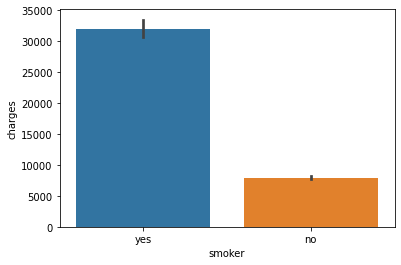

In [154]:
sns.barplot(data=plot_df,x='smoker',y='charges')


# Q2. Are men more likely to smoke than women?

null hypothesis:there is no relationship between a smoker's Sex and if they smoker.

alternative hypothesis: there is a relationship between a smoker's sex and if they smoke


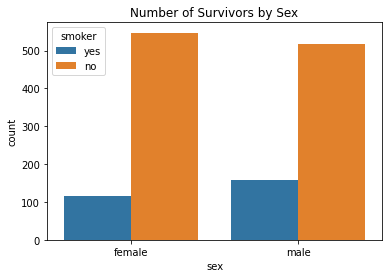

In [155]:
ax = sns.countplot(data=df, x='sex',hue='smoker')
ax.set_title("Number of Survivors by Sex");

In [156]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table



smoker,no,yes
sex,,
female,547,115
male,517,159


In [157]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results



In [158]:
# What was our p-value?
print(p)
p<.05



0.006548143503580696


True

The p-value is much less than 0.05 (always be careful to note the scientific notation "0.006"), so we have a significant result.



Since our p < .05, we reject the null hypothesis that there is no relationship between a smoker's Sex and if they smoke.
This means that we accept the alternate hypothesis and conclude that there is a relationship between a smoker's sex and if they smoke.

# Q3.Do different regions have different charges, on average?

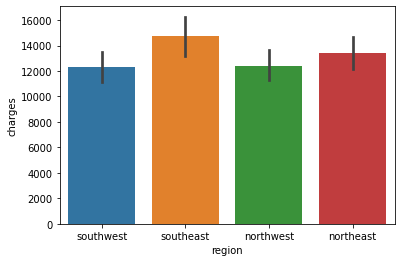

In [159]:
sns.barplot(data=df, x='region',y='charges');

Hypothesis

Null Hypothesis:  Different regions all have the same charges. 

Alternative Hypothesis: Different regions have different charges.

In [160]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [161]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [162]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df



,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [167]:
# not using * operator, entering each group manually
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northeast'])


LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [165]:
# with the * operator 
stats.levene(*groups.values())


LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

We have equal variance

In [172]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [173]:
result.pvalue <.05

True

In [174]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']



In [175]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()



group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


You can see in the summary above that there are 6 significant results.  We see that there is a significant difference in charges between southeast and southwest.  There is no difference between northeast and northwest and between northeast and southeast and so go.
In conclusion, our test showed that there is a significant difference in the results of region 6 compared to the other five regions.  The amount of charges was significantly higher for those who were on group 6.